In [2]:
import csv
import numpy as np

In [3]:
def load_data(file_path):
    data = []
    with open(file_path, mode='r', encoding='utf-8') as file:
        # 创建一个 csv reader 对象
        csv_reader = csv.reader(file)
        
        # 逐行读取 CSV 文件
        numd = 0
        for row in csv_reader:
            if numd == 0:
                numd += 1
                continue
            data.append(row)
    return data


In [4]:
def one_hot_tagmap(data, excl = []):
    data_t = data.T
    
    tags = []
    for i, arr in enumerate(data_t):
        if i in excl:
            continue
        tags += set(arr)

    tagsmap = {}
    for i, tag in enumerate(tags):
        tagsmap[tag] = i

    return tagsmap
    

In [5]:
def z_score_encode(data, incl = []):
    data_t = data.T
    mean_std = {}
    for i in incl:
        mean = data_t[i].astype("float32").mean()
        std = data_t[i].astype("float32").std()
        mean_std[str(i)] = (mean,std)

    for i in incl:
        data_t[i] = (data_t[i].astype("float32") - mean_std[str(i)][0]) / mean_std[str(i)][1]

    return data_t.T, mean_std

In [6]:
def z_score_encode_ex(data, mean_std, incl = []):
    data_t = data.T
    for i in incl:
        data_t[i] = (data_t[i].astype("float32") - mean_std[str(i)][0]) / mean_std[str(i)][1]
    return data_t.T

In [7]:
train_data_raw = load_data('train.csv')
test_data_raw = load_data('test.csv')
train_data_np = np.asarray(train_data_raw)
test_data_np = np.asarray(test_data_raw)
tagmap = one_hot_tagmap(train_data_np,[0,2,3,8])

In [8]:
train_data_zs, mean_std = z_score_encode(train_data_np, [0,2,3,8])
test_data_zs = z_score_encode_ex(test_data_np, mean_std, [0,2,3,8])

In [9]:
x_train = np.zeros((38182,28))
y_train = np.zeros((38182,1))
x_test = np.zeros((389,28))
y_test = np.zeros((389,1))

In [10]:
for i, d in enumerate(train_data_zs):
    for v in d:
        if v in tagmap:
            x_train[i][tagmap[v]] = 1
    x_train[i][25] = d[0]
    x_train[i][26] = d[3]
    x_train[i][27] = d[8]
    y_train[i] = d[2]

for i, d in enumerate(test_data_zs):
    for v in d:
        if v in tagmap:
            x_test[i][tagmap[v]] = 1
    x_test[i][25] = d[0]
    x_test[i][26] = d[3]
    x_test[i][27] = d[8]
    y_test[i] = d[2]
            

In [11]:
x_val = x_train[-8000:]
y_val = y_train[-8000:]
x_train = x_train[:-8000]
y_train = y_train[:-8000]

In [12]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

In [21]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation='linear')
])

In [22]:
# 编译模型
optimizer = RMSprop(learning_rate=0.0003)
model.compile(optimizer=optimizer,
              loss="mse",
              metrics=["mae"])

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=2000,
    batch_size=3000,
    validation_data=(x_val, y_val))

Epoch 1/2000
11/11 [==============================] - 0s 16ms/step - loss: 0.9941 - mae: 0.7322 - val_loss: 0.9626 - val_mae: 0.7275
Epoch 2/2000
11/11 [==============================] - 0s 11ms/step - loss: 0.9785 - mae: 0.7264 - val_loss: 0.9732 - val_mae: 0.7453
Epoch 3/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.9757 - mae: 0.7264 - val_loss: 0.9597 - val_mae: 0.7224
Epoch 4/2000
11/11 [==============================] - 0s 10ms/step - loss: 0.9707 - mae: 0.7233 - val_loss: 0.9700 - val_mae: 0.7479
Epoch 5/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.9696 - mae: 0.7246 - val_loss: 0.9562 - val_mae: 0.7306
Epoch 6/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.9673 - mae: 0.7226 - val_loss: 0.9563 - val_mae: 0.7262
Epoch 7/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.9655 - mae: 0.7217 - val_loss: 0.9565 - val_mae: 0.7286
Epoch 8/2000
11/11 [==============================] - 0s 3ms/step - loss

In [24]:
history_dict = history.history

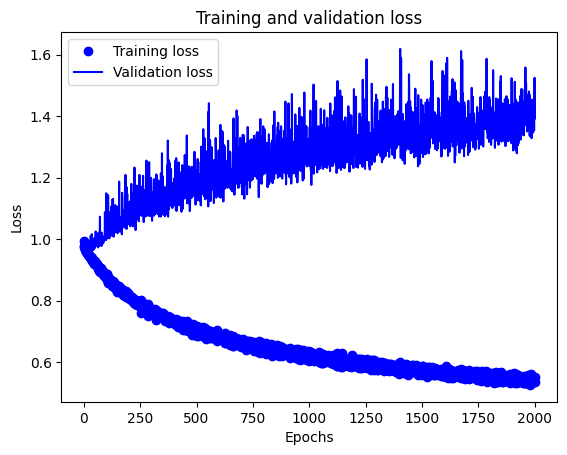

In [25]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

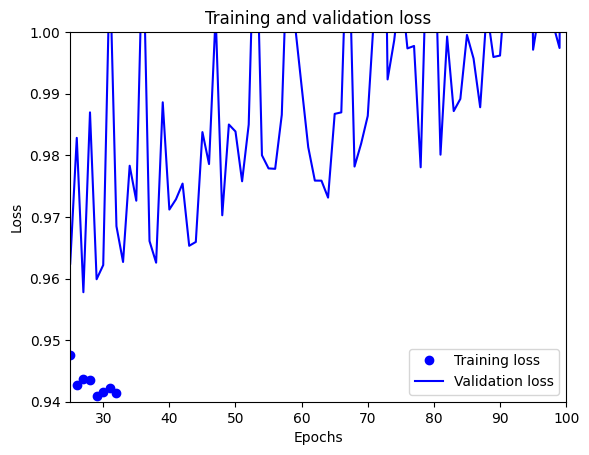

In [26]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.xlim(25, 100)
plt.ylim(0.94, 1)
plt.show()

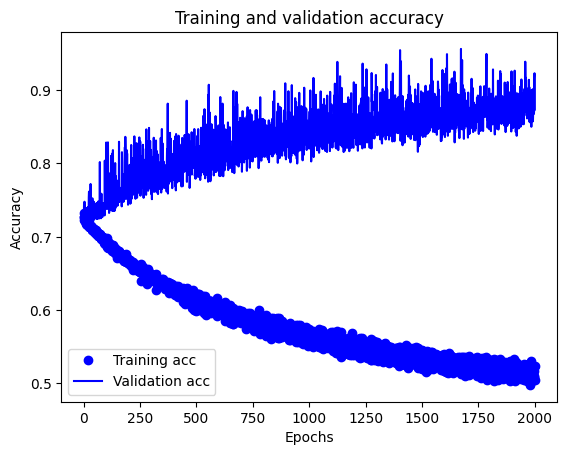

In [27]:
acc = history_dict["mae"]
val_acc = history_dict["val_mae"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 1000us/step - loss: 0.8638 - mae: 0.6798


In [20]:
tty = np.asarray([0] * len(x_test)).astype("float32")
model.evaluate(x_test, tty)

13/13 [==============================] - 0s 1ms/step - loss: 0.0559 - mae: 0.1762


[0.05591961368918419, 0.17617127299308777]

In [21]:
def gw(v):
    return (v * mean_std["2"][1]) + mean_std["2"][0]

In [22]:
gw(0.67)

261223.61515625002

In [23]:
res = model.predict(x_train)

In [24]:
res[3]

array([0.5512531], dtype=float32)

In [25]:
y_test[3]

array([-1.5371425])